In [50]:
from sqlalchemy import create_engine, text
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
engine = create_engine("sqlite:///nfl_data.db")
conn = engine.connect()

In [110]:
#conn.execute(text("DROP TABLE IF EXISTS wk18hotels;"))
#conn.execute(text("DROP TABLE IF EXISTS wk18flights;"))
#conn.execute(text("DROP TABLE IF EXISTS wk18tickets;"))

conn.execute(text("DROP TABLE IF EXISTS WChotels;"))
conn.execute(text("DROP TABLE IF EXISTS WChotelswk18;"))
conn.execute(text("DROP TABLE IF EXISTS WCflights;"))
conn.execute(text("DROP TABLE IF EXISTS WCflightswk18;"))



conn.execute(text("""
    CREATE TABLE WChotels (
        Team TEXT, 
        Name TEXT, 
        Price REAL, 
        Rating REAL,
        Room_Type TEXT
    )
"""))

conn.execute(text("""
    CREATE TABLE WChotelswk18 (
        Team TEXT, 
        Name TEXT, 
        Price REAL, 
        Rating REAL,
        Room_Type TEXT
    )
"""))

conn.execute(text("""
    CREATE TABLE WCflights (
        Team TEXT, 
        Airline TEXT, 
        Departure_Time TEXT, 
        Arrival_Time TEXT,
        price REAL
    )
"""))

conn.execute(text("""
    CREATE TABLE WCflightswk18 (
        Team TEXT, 
        Airline TEXT, 
        Departure_Time TEXT, 
        Arrival_Time TEXT,
        price REAL
    )
"""))

#conn.execute(text("""
  #  CREATE TABLE IF NOT EXISTS wk18tickets (
  #      team TEXT, 
  #      price REAL, 
  #      section TEXT
   # )
#"""))

conn.commit()

hotels_df = pd.read_csv("data/WChotels.csv")
hotelswk18_df = pd.read_csv("data/WChotelswk18.csv")
flights_df = pd.read_csv("data/WCflights.csv")
flightswk18_df = pd.read_csv("data/WCflightswk18.csv")
#ticket_prices_df = pd.read_csv("data/ticket_prices.csv")

hotels_df.to_sql('WChotels', engine, if_exists='append', index=False)
hotelswk18_df.to_sql("WChotelswk18", engine, if_exists='append', index=False)
flights_df.to_sql('WCflights', engine, if_exists='append', index=False)
flightswk18_df.to_sql('WCflightswk18', engine, if_exists='append', index = False)
#ticket_prices_df.to_sql('wk18tickets', engine, if_exists='append', index=False)

conn.close()

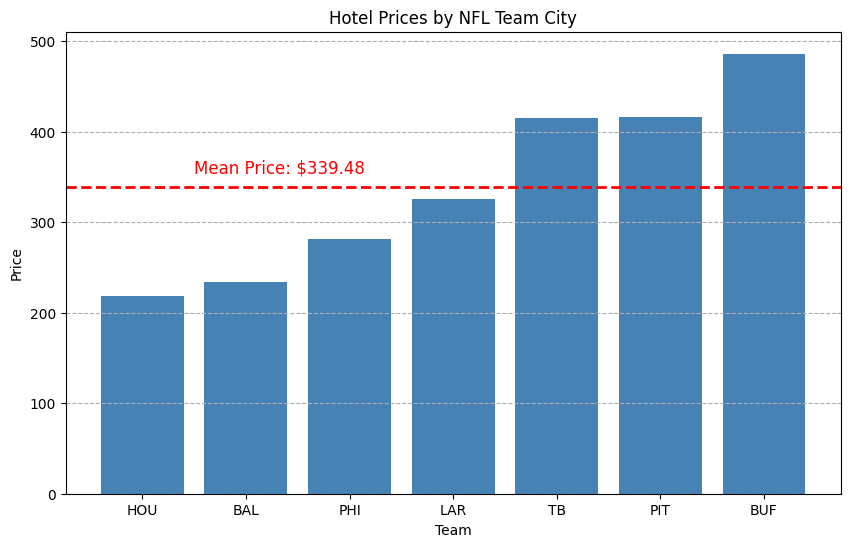

In [111]:
# this gives us the average hotel price in each teams city for wilcard weekend
conn = engine.connect()

query = """
SELECT team, AVG(price) AS avg_hotel_price
FROM WChotels
GROUP BY team
ORDER BY avg_hotel_price;
"""
result = conn.execute(text(query))
data = result.fetchall()

teams = [item[0] for item in data]
prices = [item[1] for item in data]
mean_price = np.mean(prices)

plt.figure(figsize=(10,6))
plt.bar(teams, prices, color = 'steelblue')
plt.axhline(mean_price, color='red', linestyle='--', linewidth=2)
plt.text(.5, mean_price + 15, f'Mean Price: ${mean_price:.2f}', fontsize=12, color='red')
plt.title("Hotel Prices by NFL Team City")
plt.xlabel("Team")
plt.ylabel("Price")
plt.grid(True, axis = 'y', linestyle = '--')
plt.show()

conn.close()

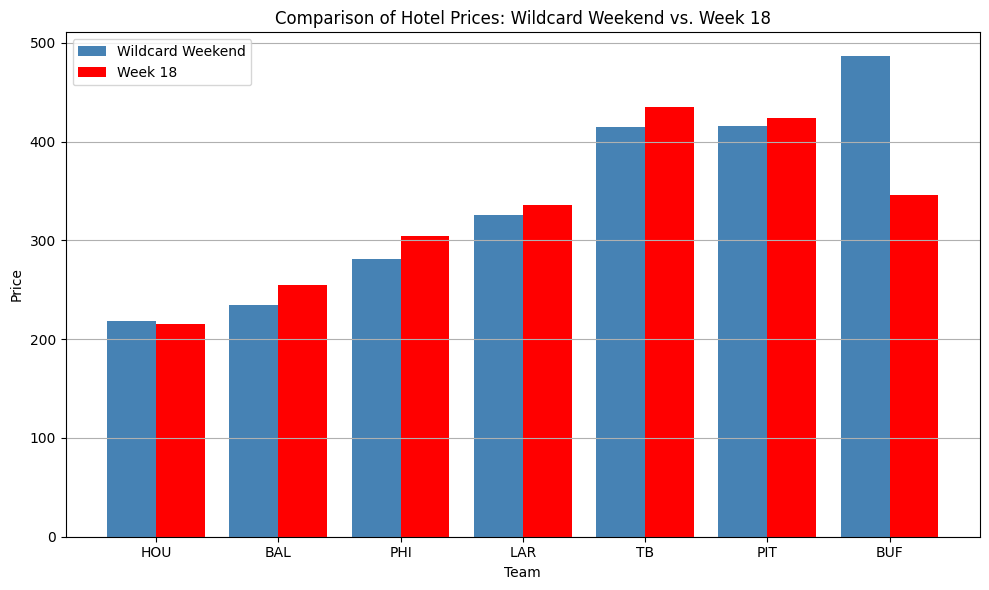

In [112]:
conn = engine.connect()

query = """
SELECT 
    WChotels.team AS team,
    AVG(WChotels.price) AS avg_price_wc,
    AVG(WChotelswk18.price) AS avg_price_wk18
FROM WChotels
JOIN WChotelswk18 ON WChotels.team = WChotelswk18.team
GROUP BY WChotels.team
ORDER BY avg_price_wc;
"""
result = conn.execute(text(query))
data = result.fetchall()

teams = [item[0] for item in data]
avg_price_wc = [item[1] for item in data]
avg_price_wk18 = [item[2] for item in data]

x = range(len(teams))
bar_width = 0.4

plt.figure(figsize=(10, 6))
plt.bar(x, avg_price_wc, width=bar_width, color='steelblue', label='Wildcard Weekend')
plt.bar([p + bar_width for p in x], avg_price_wk18, width=bar_width, color='red', label='Week 18')

plt.xticks([p + bar_width / 2 for p in x], teams)
plt.title("Comparison of Hotel Prices: Wildcard Weekend vs. Week 18")
plt.xlabel("Team")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.grid(True, axis='y', linestyle='-')
plt.show()


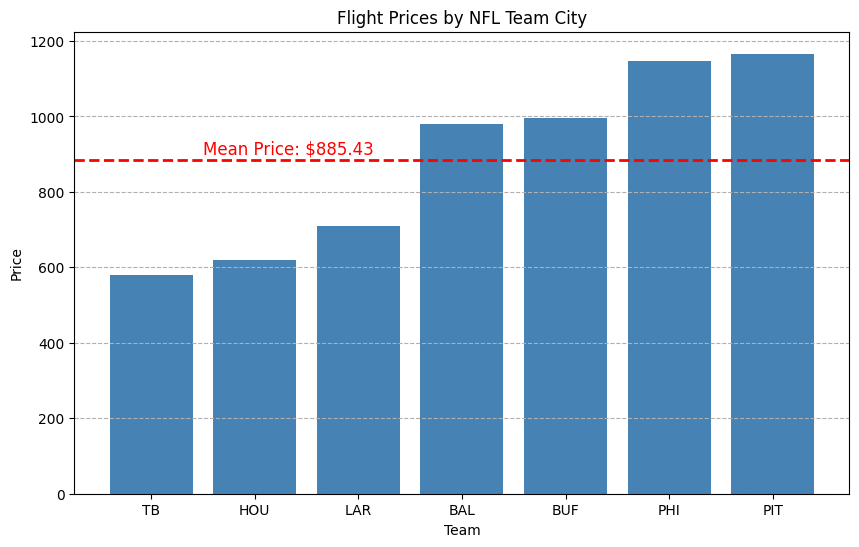

In [114]:
# this gives us the average hotel price in each teams city for wilcard weekend
conn = engine.connect()

query = """
SELECT team, AVG(price) AS flight_price
FROM WCflights
GROUP BY team
ORDER BY flight_price;
"""
result = conn.execute(text(query))
data = result.fetchall()

teams = [item[0] for item in data]
prices = [item[1] for item in data]
mean_price = np.mean(prices)

plt.figure(figsize=(10,6))
plt.bar(teams, prices, color = 'steelblue')
plt.axhline(mean_price, color='red', linestyle='--', linewidth=2)
plt.text(.5, mean_price + 15, f'Mean Price: ${mean_price:.2f}', fontsize=12, color='red')
plt.title("Flight Prices by NFL Team City")
plt.xlabel("Team")
plt.ylabel("Price")
plt.grid(True, axis = 'y', linestyle = '--')
plt.show()

conn.close()

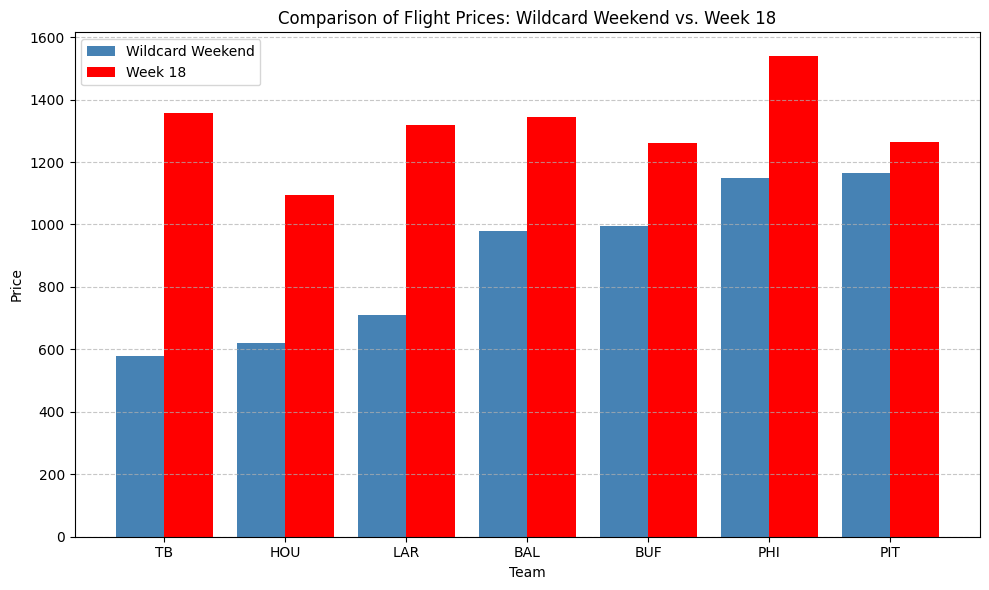

In [115]:
conn = engine.connect()

query = """
SELECT 
    WCflights.team AS team,
    AVG(WCflights.price) AS avg_price_wc,
    AVG(WCflightswk18.price) AS avg_price_wk18
FROM WCflights
JOIN WCflightswk18 ON WCflights.team = WCflightswk18.team
GROUP BY WCflights.team
ORDER BY avg_price_wc;
"""
result = conn.execute(text(query))
data = result.fetchall()

teams = [item[0] for item in data]
avg_price_wc = [item[1] for item in data]
avg_price_wk18 = [item[2] for item in data]

x = range(len(teams))
bar_width = 0.4

plt.figure(figsize=(10, 6))
plt.bar(x, avg_price_wc, width=bar_width, color='steelblue', label='Wildcard Weekend')
plt.bar([p + bar_width for p in x], avg_price_wk18, width=bar_width, color='red', label='Week 18')

plt.xticks([p + bar_width / 2 for p in x], teams)
plt.title("Comparison of Flight Prices: Wildcard Weekend vs. Week 18")
plt.xlabel("Team")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

conn.close()


In [92]:
# this gives us the average 'cheap' ticket price for each city
conn = engine.connect()

query = """
SELECT team, AVG(Price) AS ticket_price
FROM WCtickets
GROUP BY team
ORDER BY ticket_price;
"""
result = conn.execute(text(query))
data = result.fetchall()

teams = [item[0] for item in data]
prices = [item[1] for item in data]
median_price = np.median(prices)

plt.figure(figsize=(10,6))
plt.barh(teams, prices, color = 'steelblue')
plt.axvline(median_price, color='red', linestyle='--', linewidth=2)
plt.text(median_price + 20, 4, f'Median Price: ${median_price:.2f}', va='center', fontsize=12, color='red')
plt.title("Ticket Prices by NFL Team City from Chicago O'Hare")
plt.xlabel("Price")
plt.ylabel("Team")
plt.xticks(rotation = 45)
plt.grid(True, axis = 'x', linestyle = '-')
plt.show()

OperationalError: (sqlite3.OperationalError) no such table: WCtickets
[SQL: 
SELECT team, AVG(Price) AS ticket_price
FROM WCtickets
GROUP BY team
ORDER BY ticket_price;
]
(Background on this error at: https://sqlalche.me/e/20/e3q8)